# Value Class & Graph with nodes and edges exaple
**Problem to be solved:** We have to make a new kind of tool (a data structure) that can help us build a chart like this: 

![](../_static/output.svg.svg)

The usual number storing tool ('int') can't keep all the information we need. Besides just holding a number, we want this new tool to remember the original name of the object, what other objects helped make it, and what math actions (like adding or multiplying) were used to create it. So, we need to build a new, smarter tool that can remember all these things.

In [7]:
# Install graphviz on you computer: https://graphviz.org/download/
# install requirement packages in this project
%pip install graphviz

#import into this project
from graphviz import Digraph


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
class Value:
  
    def __init__(self, data, _parents=(), _operator='', label=''):
        self.data = data                # the actual value
        self._prev = set(_parents)      # the 2 or more object used to create the object
        self._op = _operator            # the operator used when creating the object (+,-,*,/)
        self.label = label              # The variable name connected to the object

    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
  
    def __truediv__(self, other):
        if other.data == 0:  # Division by zero check
            raise ValueError("Division by zero is not allowed")
        return Value(self.data / other.data, (self, other), '/')

### Draw Dot Code
The following import of a functions are not super important for you to look at right now.     
The function 'draw_dot' takes care of drawing the diagram, and expects a Value object as parameter input.     

**The focus in this demo should be on the Value class.**    

If you later look through the code step by step, you should by now (after 6 weeks with python) be able to understand what it does.     
If you do not understand the code, it is a good exercise to go through the code and understand it.

The [graphcode.py](https://github.com/python-elective-kea/fall2023-code-examples-from-teachings/tree/master/ses7/graphcode.py) can be found in the code from today session.

In [19]:
from testfiles.graphcode import draw_dot

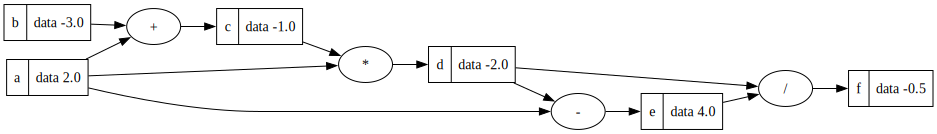

In [20]:
a = Value(2, label='a')
b = Value(-3, label='b')
c = a + b; c.label='c'
d = a * c; d.label = 'd'
e = a - d; e.label = 'e'
f = d / e; f.label = 'f'

draw_dot(f)

### Methods in an int class

In [11]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Built-in subclasses:
 |      bool
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      True if 